## General imports 

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# this line is so the modules in the next cell get imported. They live in this path 
sys.path.append('/jukebox/wang/ahoag/ClearMap2')

## Clearmap specific imports

In [19]:
import ClearMap.IO.Workspace as wsp
import ClearMap.ImageProcessing.Experts.Cells as cells
import ClearMap.IO.IO as io

# Set up the workspace

In [4]:
directory = os.path.join('/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_LaVision',
    'zimmerman_01_LaVision-001/imaging_request_1/output')    
expression_raw      = 'full_sizedatafld/cz_01_1_1x_642_016na_1hfds_z10um_50msec_ch00/cz_01_1_1x_642_016na_1hfds_z10um_50msec_C00_Z<A,4>.tif'           
# expression_auto     = 'full_sizedatafld/cz_01_1_1x_488_016na_1hfds_z10um_50msec_ch00/cz_01_1_1x_488_016na_1hfds_z10um_50msec_C00_Z<Z,4>.tif'
ws = wsp.Workspace('CellMap', directory=directory);
# ws.update(raw=expression_raw, autofluorescence=expression_auto)
ws.update(raw=expression_raw)
# ws.update(raw=expression_raw)
# ws.debug='bckcorr'
ws.debug=False
ws.info()

Workspace[CellMap]{/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_LaVision/zimmerman_01_LaVision-001/imaging_request_1/output}
              raw: full_sizedatafld/cz_01_1_1x_642_016na_1hfds_z10um_50msec_ch00/cz_01_1_1x_642_016na_1hfds_z10um_50msec_C00_Z<A,4>.tif {654 files, ('A',): (0,) -> (653,)}
 autofluorescence: no file
         stitched: stitched.npy
           layout: no file
       background: no file
        resampled: no file
resampled_to_auto: no file
auto_to_reference: no file
            cells: no file
          density: no file



## Set up a test environment in which we will run cell detection on a subvolume

In [16]:
ws.debug='test'
ws.info()

Workspace[CellMap]{/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_LaVision/zimmerman_01_LaVision-001/imaging_request_1/output}[test]
              raw: full_sizedatafld/cz_01_1_1x_642_016na_1hfds_z10um_50msec_ch00/cz_01_1_1x_642_016na_1hfds_z10um_50msec_C00_Z<A,4>.tif {654 files, ('A',): (0,) -> (653,)}
 autofluorescence: no file
         stitched: test_stitched.npy
           layout: no file
       background: no file
        resampled: no file
resampled_to_auto: no file
auto_to_reference: no file
            cells: no file
          density: no file



In [12]:
ws.source('raw').shape # the whole volume shape

(1825, 2169, 654)

# Create the subvolume

In [13]:
slicing = (slice(1000,1200),slice(1000,1200),slice(300,350))
ws.create_debug('stitched', slicing=slicing)

'/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_LaVision/zimmerman_01_LaVision-001/imaging_request_1/output/test_stitched.npy'

In [14]:
ws.source('stitched').shape # the subvolume shape

(200, 200, 50)

In [17]:
ws.filename('stitched') # the name of the subvolume file

'/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_LaVision/zimmerman_01_LaVision-001/imaging_request_1/output/test_stitched.npy'

# cell detection on test volume

In [20]:
cell_detection_parameter = cells.default_cell_detection_parameter.copy()
cell_detection_parameter['illumination'] = None
cell_detection_parameter['background_correction']['shape'] = (5,5)
cell_detection_parameter['intensity_detection']['measure'] = ['source','background']
cell_detection_parameter['shape_detection']['threshold'] = 250

io.delete_file(ws.filename('cells', postfix='maxima'))
cell_detection_parameter['maxima_detection']['save'] = ws.filename('cells', postfix='maxima')

processing_parameter = cells.default_cell_detection_processing_parameter.copy()
processing_parameter.update(
    processes = 'serial',
    size_max = 100, #35,
    size_min = 30, #30,
    overlap  = 15, #10,
    verbose = True
    )

cells.detect_cells(ws.filename('stitched'), ws.filename('cells', postfix='raw'),
                   cell_detection_parameter=cell_detection_parameter,
                   processing_parameter=processing_parameter)

Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Background removal shape: (5, 5)
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Background removal form : Disk
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Background removal save : False
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Illumination correction: elapsed time: 0:00:00.048
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: DoG filter: shape : None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: DoG filter: sigma : None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: DoG filter: sigma2: None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: DoG filter: elapsed time: 0:00:00.000
Block 0/

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.733
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Shape detection: elapsed time: 0:00:00.816
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Shape detection: elapsed time: 0:00:00.116
Block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: Cell detection: elapsed time: 0:00:01.207
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (200, 200, 50)@(200, 200, 50)[(:,:,0:50)]: elapsed time: 0:00:01.299
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:01.349


'/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_LaVision/zimmerman_01_LaVision-001/imaging_request_1/output/test_cells_raw.npy'

# Visualize distribution of cell counts

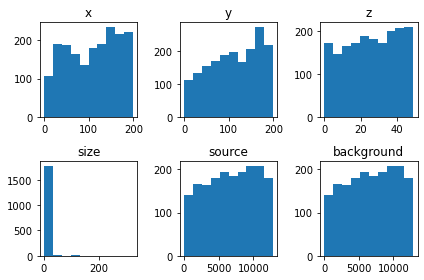

In [21]:
source = ws.source('cells', postfix='raw')

plt.figure(1); plt.clf();
names = source.dtype.names;
nx,ny = 2,3
for i, name in enumerate(names):
    plt.subplot(nx, ny, i+1)
    plt.hist(source[name]);
    plt.title(name)
plt.tight_layout();

In [22]:
ws.source('cells', postfix='raw') 

Memmap-Source(1822,)[[('x', '<i8'), ('y', '<i8'), ('z', '<i8'), ('size', '<i8'), ('source', '<f8'), ('background', '<f8')]]|C|{/jukebox/wang/ahoag/test_clearmap2/output/cz15/zim...on-001/imaging_request_1/output/test_cells_raw.npy}

# Plot a single z plane from the raw data

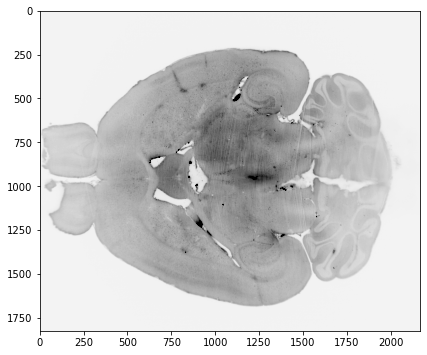

In [38]:
z_plane = ws.source('raw')[:,:,300]
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(121)
ax.imshow(z_plane,vmin=30,vmax=1500,cmap='gray_r')
# ax_300 = fig.add_subplot(122)
# ax_300.imshow(z_plane_300)

# Plot cells on top of raw data

In [26]:
coordinates = np.hstack([ws.source('cells', postfix='raw')[c][:,None] for c in 'xyz']);
this_plane_coords = np.array([coord for coord in coordinates if coord[-1] ==0])

xs = this_plane_coords[:,0]
ys = this_plane_coords[:,1]

this_z_plane = ws.source('stitched')[:,:,0]
fig,axes = plt.subplots(figsize=(15,8),nrows=1,ncols=2,sharex=True,sharey=True)
ax_tissue = axes[0]
ax_tissue.imshow(this_z_plane,cmap='gray_r',vmin=30,vmax=1500)
ax_both=axes[1]
ax_both.imshow(this_z_plane,vmin=30,vmax=1500,cmap='gray_r')
ax_both.scatter(ys,xs,s=50,facecolors='none',edgecolors='r')

# Filter by size

In [34]:
thresholds = { 'source' : None, 'size' : (10,100) }

cells.filter_cells(source = ws.filename('cells', postfix='raw'), 
                   sink = ws.filename('cells', postfix='filtered'),
                   thresholds=thresholds);

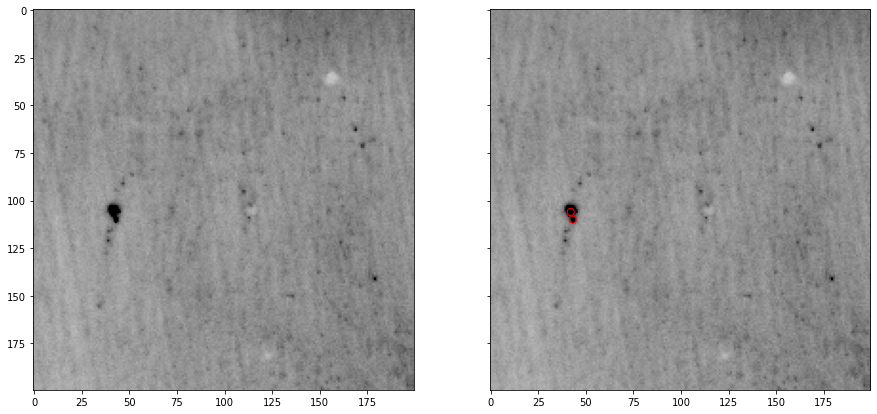

In [35]:
# Then plot again
coordinates = np.hstack([ws.source('cells', postfix='filtered')[c][:,None] for c in 'xyz']);
this_plane_coords = np.array([coord for coord in coordinates if coord[-1] ==0])

xs = this_plane_coords[:,0]
ys = this_plane_coords[:,1]

this_z_plane = ws.source('stitched')[:,:,0]
fig,axes = plt.subplots(figsize=(15,8),nrows=1,ncols=2,sharex=True,sharey=True)
ax_tissue = axes[0]
ax_tissue.imshow(this_z_plane,cmap='gray_r',vmin=30,vmax=1500)
ax_both=axes[1]
ax_both.imshow(this_z_plane,vmin=30,vmax=1500,cmap='gray_r')
ax_both.scatter(ys,xs,s=50,facecolors='none',edgecolors='r')

In [39]:
ws.source('cells', postfix='maxima')

Memmap-Source(200, 200, 50)[float64]|F|{/jukebox/wang/ahoag/test_clearmap2/output/cz15/zim...001/imaging_request_1/output/test_cells_maxima.npy}

In [40]:
ws.source('cells', postfix='raw')

Memmap-Source(1822,)[[('x', '<i8'), ('y', '<i8'), ('z', '<i8'), ('size', '<i8'), ('source', '<f8'), ('background', '<f8')]]|C|{/jukebox/wang/ahoag/test_clearmap2/output/cz15/zim...on-001/imaging_request_1/output/test_cells_raw.npy}

In [41]:
ws.source('cells', postfix='maxima')[0]

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])